# Plotting teams exploration of tradespace over the theoretical traedspace

First making sure that I can read Katie's files:


In [150]:
import os.path
from scipy.io import loadmat

ANALYTICAL_TRADESPAVCE_FILE = os.path.expanduser("~/Learning2019Data/AnalyticalTradespace/tradespaceData.mat")
x = loadmat(ANALYTICAL_TRADESPAVCE_FILE)

timeCampus       = list()
totalCost        = list()
interactionScore = list()
diversityScore   = list()

for data_row in x['MasieResults']:
    for i in range(len(data_row)):
        timeCampus.append       (data_row[i][0][0][ 9][0][0])
        totalCost.append        (data_row[i][0][0][10][0][0])
        interactionScore.append (data_row[i][0][0][11][0][0])
        diversityScore.append   (data_row[i][0][0][12][0][0])


In [123]:
x['MasieResults'][0][0][0][0][12]

array([[0.13505104]])

In [128]:
x['MasieResults'][2][0][0]

array([(array([[   0,    0, 1000,    0, 4000,    0]], dtype=uint16), array([[   0, 1167,    0, 1167, 1167,    0]], dtype=uint16), array([[   0,    0,    0,    0,    0, 1500]], dtype=uint16), array([[ 0,  5,  9,  5, 17,  9]], dtype=uint8), array([[  0.        , 214.22450728, 450.        , 214.22450728,
        164.50551577, 300.        ]]), array([[  0. , 119. , 235.9, 119. , 444.7, 235.9]]), array([[0.        , 0.8557667 , 1.11021962, 0.8557667 , 1.61912548,
        1.11021962]]), array([[0.       , 0.       , 0.       , 0.       , 0.5342209, 0.       ]]), array([[0.        , 0.04010965, 0.03665448, 0.04010965, 0.03252479,
        0.03665907]]), array([[266.7419022]]), array([[1154.5]]), array([[0.03721153]]), array([[0.10684418]]))],
      dtype=[('redTeam', 'O'), ('blueTeam', 'O'), ('greenTeam', 'O'), ('numFloors', 'O'), ('density', 'O'), ('buildingCost', 'O'), ('transitTime', 'O'), ('diversity', 'O'), ('interactionProbability', 'O'), ('timeCampus', 'O'), ('totalCost', 'O'), ('intera

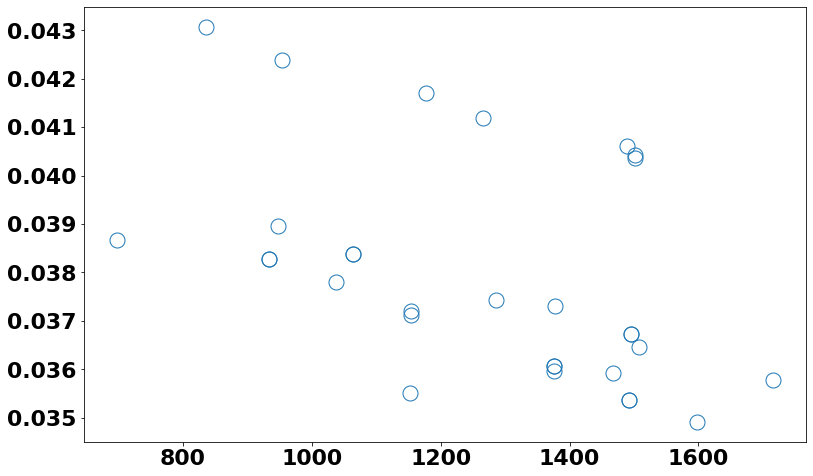

In [130]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

GOLDEN_RATIO = np.array([1.61803398875, 1])
plt.figure(figsize=GOLDEN_RATIO*8)

plt.plot(totalCost, interactionScore, marker="o", linewidth=0, markersize=15, fillstyle='none')
plt.show()

In [129]:
totalCost

[697.3,
 1266.4,
 1154.5,
 1467.7,
 1375.8,
 1597.1,
 1037.6,
 1154.5,
 933.2,
 1492.7,
 836.3,
 1152.4,
 953.2,
 1492.7,
 1375.8,
 1375.8,
 933.2,
 1176.6,
 947.8,
 1064.7,
 1286,
 1502.3,
 1489.8,
 1494.8,
 1377.9,
 1494.8,
 1502.3,
 1716.1,
 1507.3,
 1064.7]

In [134]:
x['MasieResults']

array([[array([[(array([[   0,    0,    0,    0,    0, 5000]], dtype=uint16), array([[   0, 1167, 1167, 1167,    0,    0]], dtype=uint16), array([[   0,    0,    0,    0,    0, 1500]], dtype=uint16), array([[ 0,  5,  5,  5,  0, 13]], dtype=uint8), array([[  0.        , 214.22450728, 214.22450728, 214.22450728,
          0.        , 100.        ]]), array([[  0. , 119. , 119. , 119. ,   0. , 340.3]]), array([[0.        , 0.8557667 , 0.8557667 , 0.8557667 , 0.        ,
        1.36467255]]), array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54020414]]), array([[0.        , 0.04010965, 0.04010965, 0.04010965, 0.        ,
        0.0343658 ]]), array([[256.02765498]]), array([[697.3]]), array([[0.03867369]]), array([[0.13505104]]))]],
      dtype=[('redTeam', 'O'), ('blueTeam', 'O'), ('greenTeam', 'O'), ('numFloors', 'O'), ('density', 'O'), ('buildingCost', 'O'), ('transitTime', 'O'), ('diversity', 'O'), ('interactionProbability', 'O'), ('timeCampus', 'O'), ('to

In [137]:
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Jan  7 19:08:31 2020',
 '__version__': '1.0',
 '__globals__': [],
 'MasieResults': array([[array([[(array([[   0,    0,    0,    0,    0, 5000]], dtype=uint16), array([[   0, 1167, 1167, 1167,    0,    0]], dtype=uint16), array([[   0,    0,    0,    0,    0, 1500]], dtype=uint16), array([[ 0,  5,  5,  5,  0, 13]], dtype=uint8), array([[  0.        , 214.22450728, 214.22450728, 214.22450728,
           0.        , 100.        ]]), array([[  0. , 119. , 119. , 119. ,   0. , 340.3]]), array([[0.        , 0.8557667 , 0.8557667 , 0.8557667 , 0.        ,
         1.36467255]]), array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.54020414]]), array([[0.        , 0.04010965, 0.04010965, 0.04010965, 0.        ,
         0.0343658 ]]), array([[256.02765498]]), array([[697.3]]), array([[0.03867369]]), array([[0.13505104]]))]],
       dtype=[('redTeam', 'O'), ('blueTeam', 'O'), ('greenTeam', 'O'), (

In [138]:
x = loadmat(ANALYTICAL_TRADESPAVCE_FILE)

In [145]:
x['MasieResults'][0]

array([array([[(array([[   0,    0,    0,    0,    0, 5000]], dtype=uint16), array([[   0, 1167, 1167, 1167,    0,    0]], dtype=uint16), array([[   0,    0,    0,    0,    0, 1500]], dtype=uint16), array([[ 0,  5,  5,  5,  0, 13]], dtype=uint8), array([[  0.        , 214.22450728, 214.22450728, 214.22450728,
          0.        , 100.        ]]), array([[  0. , 119. , 119. , 119. ,   0. , 340.3]]), array([[0.        , 0.8557667 , 0.8557667 , 0.8557667 , 0.        ,
        1.36467255]]), array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54020414]]), array([[0.        , 0.04010965, 0.04010965, 0.04010965, 0.        ,
        0.0343658 ]]), array([[256.02765498]]), array([[697.3]]), array([[0.03867369]]), array([[0.13505104]]))]],
      dtype=[('redTeam', 'O'), ('blueTeam', 'O'), ('greenTeam', 'O'), ('numFloors', 'O'), ('density', 'O'), ('buildingCost', 'O'), ('transitTime', 'O'), ('diversity', 'O'), ('interactionProbability', 'O'), ('timeCampus', 'O'), ('tot

In [148]:
len(x['MasieResults'][0])

6365